In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/retail_sales.csv')  # Replace with your file path
# Quick check
print(df.head())
print(df.info())


FileNotFoundError: [Errno 2] No such file or directory: '/content/retail_sales.csv'

In [2]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()  # This will open a browse window

# Once uploaded, check the file name
for filename in uploaded.keys():
    print(filename)

# Load into pandas
df = pd.read_csv(filename)
print(df.head())



Saving retail_sales_dataset.csv to retail_sales_dataset.csv
retail_sales_dataset.csv
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [3]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: Error: credential propagation was unsuccessful

In [4]:
from google.colab import files
import pandas as pd

uploaded = files.upload()  # Browse and select your CSV file

# Load the first uploaded file
for filename in uploaded.keys():
    df = pd.read_csv(filename)

print(df.head())


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
import matplotlib.pyplot as plt

# Step 2a: Group by category and sum sales
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Step 2b: Plot the bar chart
plt.figure(figsize=(10,6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


KeyError: 'Category'

In [6]:
# Check all column names
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


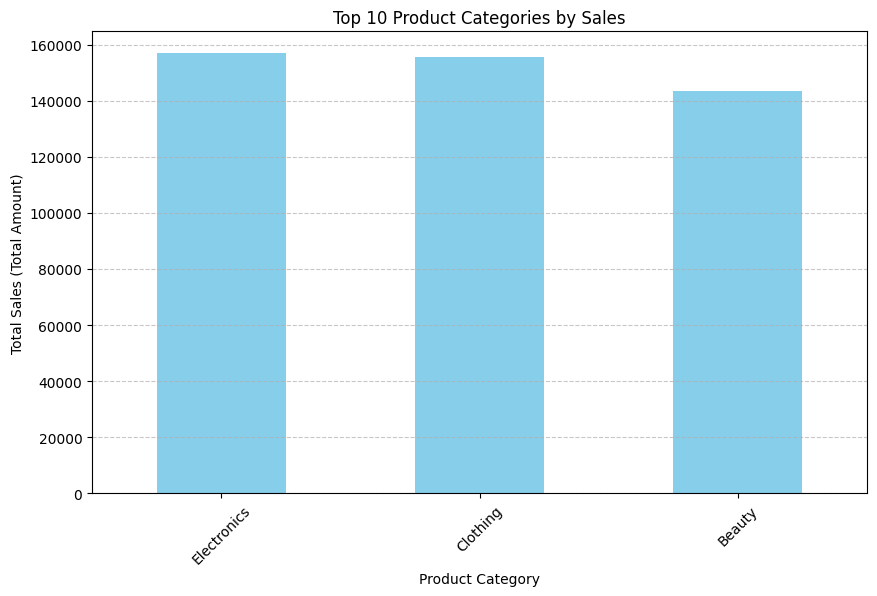

In [7]:
import matplotlib.pyplot as plt

# Group by Product Category and sum Total Amount
top_categories = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(10,6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (Total Amount)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'y'

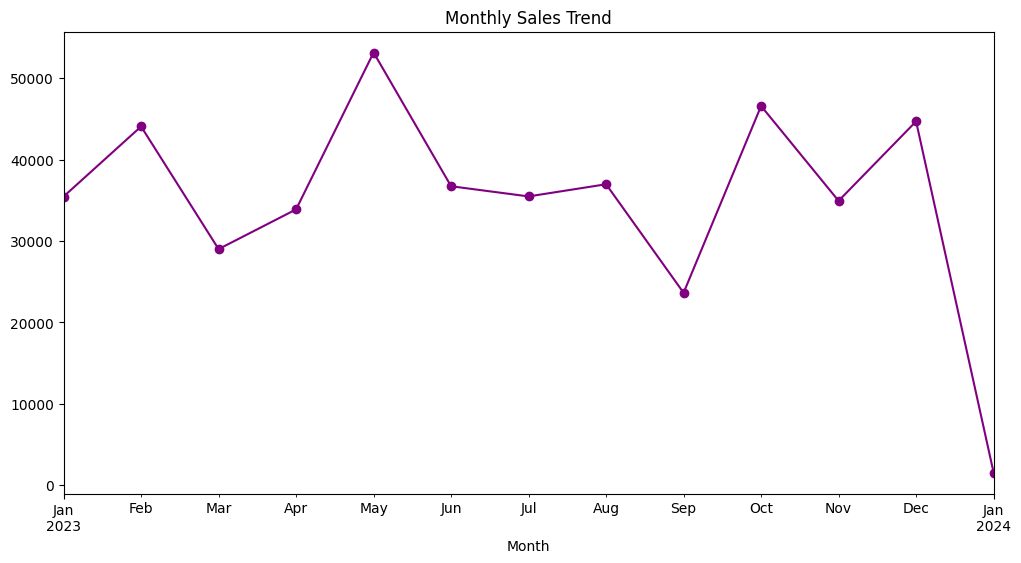

In [8]:
# Step 3a: Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3b: Group by month and sum Total Amount
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

# Step 3c: Plot the line chart
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o', linestyle='-', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.y


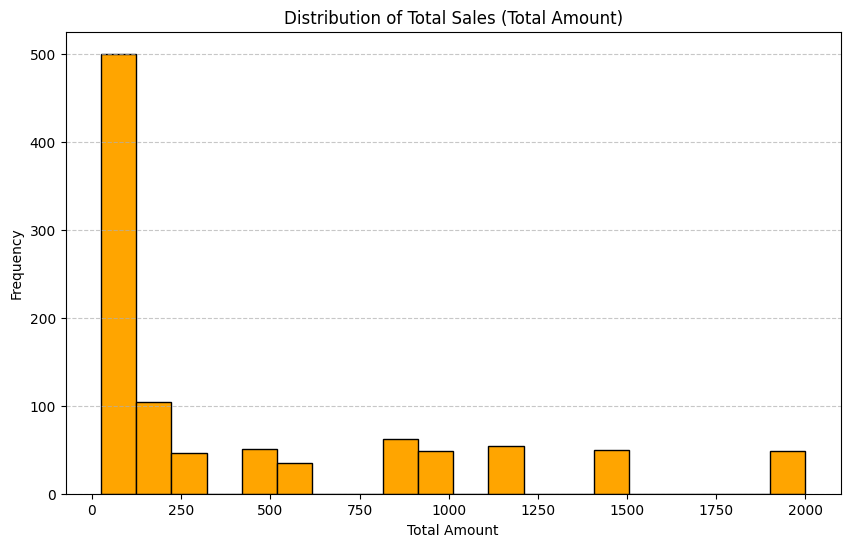

In [9]:
# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['Total Amount'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Total Sales (Total Amount)')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


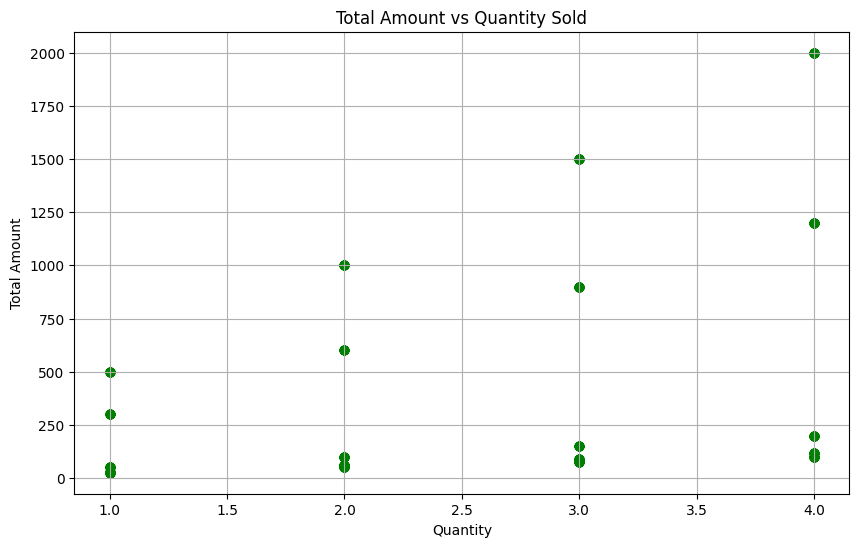

In [10]:
# Plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Quantity'], df['Total Amount'], color='green', alpha=0.6)
plt.title('Total Amount vs Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()
